# Question D2

*Question*: Which country do you currently work in?

*Answer Type*: Single Option

*Options*: [All Countries]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['D2_Country'].head()

0     Brazil
1     Brazil
2     Brazil
3    Germany
4     Brazil
Name: D2_Country, dtype: object

In [4]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D2_Country')

In [5]:
# barplot data
indexes = list(dataframe_obj.df['D2_Country'].value_counts().index)
values = list(dataframe_obj.df['D2_Country'].value_counts())

In [6]:
# plot object
d2_plot = PlotUtils(pd.DataFrame(
    data={'Countries': indexes, 'Answers': values}
))

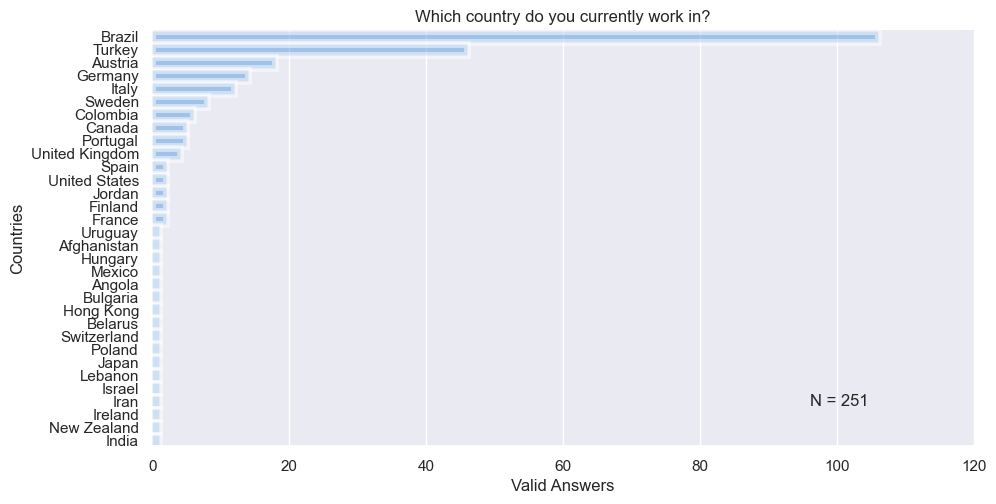

In [7]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D2_Country'])))
d2_plot.single_barplot(x_axis="Answers", y_axis="Countries", 
                       title="Which country do you currently work in?",
                       x_label="Valid Answers", y_label="Countries", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [8]:
valid_options_list = list(dataframe_obj.df['D2_Country'].unique())
valid_answers_list = list(dataframe_obj.df['D2_Country'])

In [9]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 100, 100, 95)

In [10]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping()

In [11]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [12]:
# plot object for bootstrapped data
d2_boot_plot = PlotUtils(pd.DataFrame(
    data={'Country': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

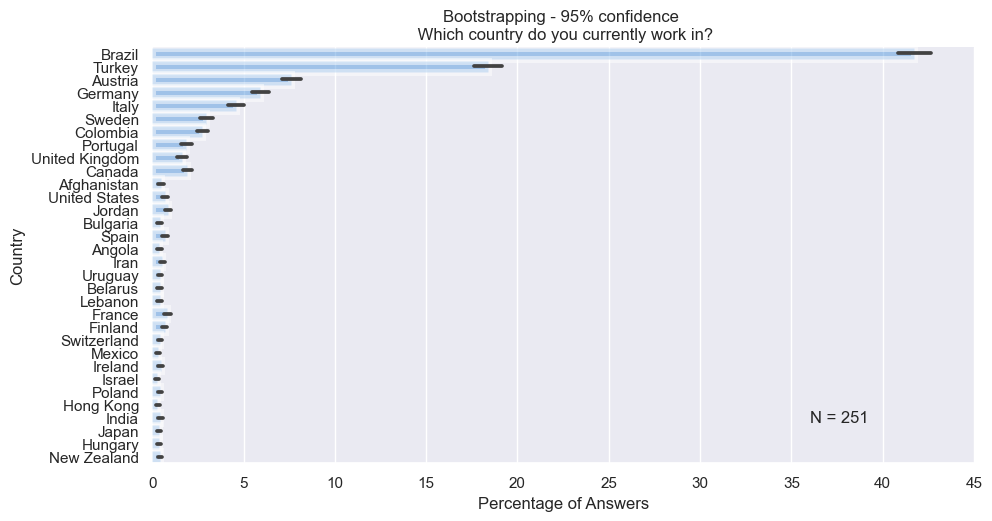

In [13]:
d2_boot_plot.single_barplot(x_axis="Value", y_axis="Country", 
                       title="Bootstrapping - 95% confidence \n Which country do you currently work in?",
                       x_label="Percentage of Answers", y_label="Country", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

In [14]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Brazil:(40.82406739053192, 41.73, 42.63593260946807)
Germany:(5.456186557273396, 5.93, 6.403813442726603)
Sweden:(2.589140704023488, 2.96, 3.330859295976512)
Colombia:(2.4510342701188117, 2.75, 3.0489657298811883)
France:(0.6449460528625323, 0.83, 1.0150539471374675)
United Kingdom:(1.364365412695857, 1.64, 1.9156345873041427)
Turkey:(17.65064276176893, 18.4, 19.14935723823107)
New Zealand:(0.3101190408092761, 0.42, 0.5298809591907239)
Finland:(0.5421827063479286, 0.68, 0.8178172936520715)
Italy:(4.146124815836008, 4.6, 5.053875184163991)
Austria:(7.064896481678245, 7.6, 8.135103518321754)
Ireland:(0.3357171599768336, 0.46, 0.5842828400231664)
Iran:(0.39503840370671667, 0.54, 0.6849615962932833)
Canada:(1.6953005224180362, 1.93, 2.164699477581964)
Israel:(0.17417509591953695, 0.28, 0.3858249040804631)
United States:(0.5238807345715255, 0.69, 0.8561192654284744)
Switzerland:(0.29685586498505834, 0.41, 0.5231441350149416)
Spain:(0.5392214022508106